In [37]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [38]:
num_inputs = 200
true_w = torch.ones(size=(num_inputs, 1)) * 0.01
true_b = 0.05
n_train, n_test = 20, 100
batch_size = 5
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size, is_train=True)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)
true_w.size()

torch.Size([200, 1])

In [46]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

def l1_penalty(w):
    return torch.sum(torch.abs(w))

In [48]:
def train(lambd):
    w, b = init_params()
    net = lambda X: d2l.linreg(X, w, b)
    loss = d2l.squared_loss
    num_epochs, lr = 300, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            l1 = loss(net(X), y).sum() 
            l2 = lambd * l1_penalty(w)
            # print(l1)
            # print(l2)
            l = l1 + l2
            # print(l)
            # l.sum().backward()
            l.backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss), 
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

w的L2范数是： 0.049693915992975235


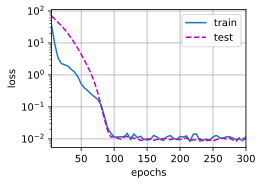

In [49]:
train(lambd=10)